# Working with Data from scratch

# Exploring your data

In [1]:
from __future__ import division
from collections import Counter, defaultdict
from functools import partial
from linear_algebra import shape, get_row, get_column, make_matrix, \
vector_mean, vector_sum, dot, magnitude, vector_subtract, scalar_multiply
from statistics import correlation, standard_deviation, mean
from probability import inverse_normal_cdf
from gradient_descent import maximize_batch
import math, random, csv
%matplotlib inline
import matplotlib.pyplot as plt
import dateutil.parser
import pandas as pd

In [2]:
# import a dataset: scores of restaurant violations from SF Open Data 
# from: https://data.sfgov.org/Health-and-Social-Services/Restaurant-Scores/stya-26eb
park_data = pd.read_csv('/Users/annalie/Dev/data-science-from-scratch/data/Park_Scores_2005-2014.csv')
park_score = park_data['Score'].tolist()
print park_score[:5]

restaurant_data = pd.read_csv('/Users/annalie/Dev/data-science-from-scratch/data/violations_plus.csv')
business_id = restaurant_data['business_id'].tolist()
counts_business_id = Counter(business_id)
num_violations = counts_business_id.values()
print num_violations[:5]

worldbank_data = pd.read_csv('https://d37djvu3ytnwxt.cloudfront.net/assets/courseware/v1/1e732b84dd39b51e4ad5b3f7ab84a964/asset-v1:MITx+14.740x+3T2016+type@asset+block/wb_dev_ind.csv')
literacy_all = worldbank_data['literacy_all'].tolist()
literacy_female= worldbank_data['literacy_female'].tolist()
literacy_male = worldbank_data['literacy_male'].tolist()
gdp_per_capita = worldbank_data['gdp_per_capita'].tolist()
infant_mortality = worldbank_data['infant_mortality'].tolist()
print worldbank_data.head()
print literacy_all[:5]

[0.79500000000000004, 0.95700000000000007, 0.8640000000000001, 0.85699999999999998, 0.8590000000000001]
[5, 9, 2, 10, 16]
  countrycode  countryname  gdp_per_capita  literacy_female  literacy_male  \
0         ABW        Aruba     19912.75700        96.719780      96.940529   
1         ADO      Andorra     35628.41100              NaN            NaN   
2         AFG  Afghanistan       415.00348        17.612062      45.417099   
3         AGO       Angola      2737.87710        59.147549      82.474831   
4         ALB      Albania      4090.86490        95.691483      98.008163   

   literacy_all  infant_mortality  
0     96.822639               NaN  
1           NaN               2.2  
2     31.741117              70.2  
3     70.580368             101.6  
4     96.845299              13.3  
[96.822638999999995, nan, 31.741116999999999, 70.580368000000007, 96.845298999999997]


In [3]:
# remove nan values for infant mortality
infant_mortality2 = []
for value in infant_mortality:
    if not math.isnan(value):
        infant_mortality2.append(value)

# remove nan values for gdp_per_capita
gdp_per_capita2 = []
for value in gdp_per_capita:
    if not math.isnan(value):
        gdp_per_capita2.append(value)

# remove nan values for infant mortality
literacy_all2 = []
for value in literacy_all:
    if not math.isnan(value):
        literacy_all2.append(value)

In [4]:
# create a histogram in which you group the data into discrete buckets
# and count how many points fall into each bucket

def bucketize(point, bucket_size):
    """floor the point to the next lower multiple of bucket_size"""
    return bucket_size * math.floor(point / bucket_size)

def make_histogram(points, bucket_size):
    """buckets the points and counts how many in each bucket"""
    return Counter(bucketize(point, bucket_size) for point in points)

def plot_histogram(points, bucket_size, title=""):
    histogram = make_histogram(points, bucket_size)
    plt.bar(histogram.keys(), histogram.values(), width=bucket_size)
    plt.title(title)
    plt.show()

# One-dimensional data

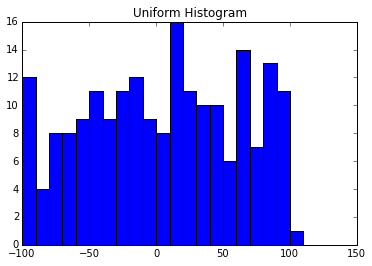

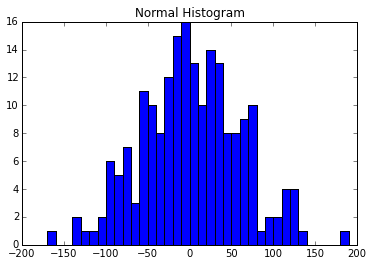

In [5]:
# for example make two random data sets
random.seed(0)

uniform = [random.randrange(-100,101) for _ in range(200)]
normal = [57 * inverse_normal_cdf(random.random())
          for _ in range(200)]

plot_histogram(uniform, 10, "Uniform Histogram")
plot_histogram(normal, 10, "Normal Histogram")

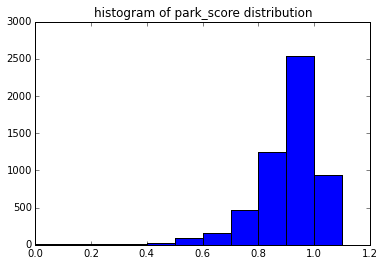

In [6]:
plot_histogram(park_score, 0.1, "histogram of park_score distribution")

# Multiple dimensions

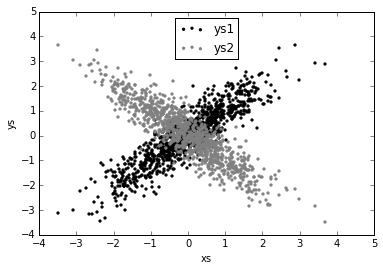

In [7]:
# for example make a random data sets

def random_normal(): 
    """returns a random draw from a standard normal distribution"""
    return inverse_normal_cdf(random.random())

xs = [random_normal() for _ in range(1000)]
ys1 = [ x + random_normal() / 2 for x in xs]
ys2 = [-x + random_normal() / 2 for x in xs]

# plot all the data points in one scatter plot
# def scatter():
plt.scatter(xs, ys1, marker='.', color='black', label='ys1')
plt.scatter(xs, ys2, marker='.', color='gray',  label='ys2')
plt.xlabel('xs')
plt.ylabel('ys')
plt.legend(loc=9)
plt.show()

192
199
154


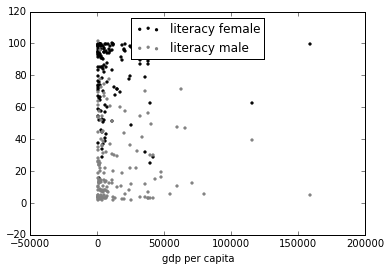

In [9]:
# remove nan values for infant mortality
infant_mortality2 = []
for value in infant_mortality:
    if not math.isnan(value):
        infant_mortality2.append(value)
        
print len(infant_mortality2)
infant_mortality2 = infant_mortality2[:150]

# remove nan values for gdp_per_capita
gdp_per_capita2 = []
for value in gdp_per_capita:
    if not math.isnan(value):
        gdp_per_capita2.append(value)

print len(gdp_per_capita2)
gdp_per_capita2 = gdp_per_capita2[:150]
        
# remove nan values for infant mortality
literacy_all2 = []
for value in literacy_all:
    if not math.isnan(value):
        literacy_all2.append(value)
        
print len(literacy_all2)
literacy_all2 = literacy_all2[:150]

plt.scatter(gdp_per_capita2, literacy_all2, marker='.', color='black', label='literacy female')
plt.scatter(gdp_per_capita2, infant_mortality2, marker='.', color='gray',  label='literacy male')
plt.xlabel('gdp per capita')
plt.legend(loc=9)
plt.show()

In [10]:
# the difference between these two data sets would also e apparent if you looked at the correlations 

# print correlations
print correlation(gdp_per_capita2, literacy_all2)
print correlation(gdp_per_capita2, infant_mortality2)

0.115950026267
-0.015919588249


# Scatterplot correlation matrix

In [11]:
def correlation_matrix(data):
    """returns the num_columns x num_columns matrix whose (i, j)th entry
    is the correlation between columns i and j of data"""
    _, num_columns = shape(data)
    
    def matrix_entry(i, j):
        return correlation(get_column(data, i), get_column(data, j))
    
    return make_matrix(num_columns, num_columns, matrix_entry)

In [12]:
# remove rows with missing values from worldbank_data dataframe
worldbank_data2 = worldbank_data.dropna(axis=0)
print "len worldbank data: ", len(worldbank_data)
print "len worldbank data without nan values: ", len(worldbank_data2)  

# keep only the continuous variables
worldbank_data3 = worldbank_data2[['gdp_per_capita', 'literacy_female', 'literacy_male', 'literacy_all', 'infant_mortality']]
worldbank_data3.head()

len worldbank data:  214
len worldbank data without nan values:  147


,gdp_per_capita,literacy_female,literacy_male,literacy_all,infant_mortality
2,415.00348,17.612062,45.417099,31.741117,70.2
3,2737.87710,59.147549,82.474831,70.580368,101.6
4,4090.86490,95.691483,98.008163,96.845299,13.3
5,25140.75700,91.474747,89.482101,90.033844,7.0
6,6195.38490,97.950249,97.879501,97.916092,11.9


In [13]:
# convert world bank data into a matrix
worldbank_matrix = worldbank_data3.values.T.tolist()

In [14]:
# return a correlation matrix
correlation_matrix(worldbank_matrix)

[[1.0,
  0.994770378419675,
  0.9911590377796768,
  0.9930069620987635,
  0.991890834198295,
  0.988967355875498,
  0.9925321966280877,
  0.9909918940681373,
  0.8850906886933451,
  0.9982989087968619,
  0.9990586815232352,
  0.9886239090983168,
  0.9913867293295688,
  0.9928447509139577,
  0.9903397776881012,
  0.9912480106360397,
  0.9874365438612926,
  0.9919210829503123,
  0.9929889863408357,
  0.9927250626823667,
  0.9926081790270203,
  0.9894956078660764,
  0.9923829356375116,
  0.9908220738398545,
  0.9965748633010217,
  0.9927691620698419,
  0.9911657420663289,
  0.9914170766918105,
  0.9903340658741355,
  0.9909515096151988,
  0.9917377069219863,
  0.9913323173498783,
  0.9928766567720732,
  0.9918919182863288,
  0.9919175035670045,
  0.9911998713466845,
  0.9896447370237147,
  0.9410024490757531,
  0.9929694740488452,
  0.9925204910128722,
  0.9968669649403236,
  0.992744597225542,
  0.9884556958549904,
  0.9910730613861138,
  0.9990502697414316,
  0.9941090802706871,
  0.998

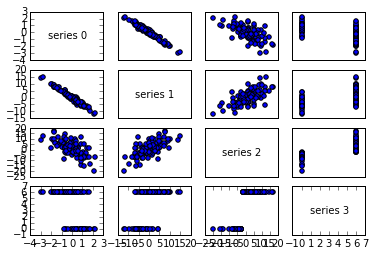

In [15]:
# plot a correlation matrix

# first, generate some random data
num_points = 100

def random_row():
    row = [None, None, None, None]
    row[0] = random_normal()
    row[1] = -5 * row[0] + random_normal()
    row[2] = row[0] + row[1] + 5 * random_normal()
    row[3] = 6 if row[2] > -2 else 0
    return row
random.seed(0)
data = [random_row()
        for _ in range(num_points)]

# then plot it
_, num_columns = shape(data)
fig, ax = plt.subplots(num_columns, num_columns)

for i in range(num_columns):
    for j in range(num_columns):

        # scatter column_j on the x-axis vs column_i on the y-axis
        if i != j: ax[i][j].scatter(get_column(data, j), get_column(data, i))

        # unless i == j, in which case show the series name
        else: ax[i][j].annotate("series " + str(i), (0.5, 0.5),
                                xycoords='axes fraction',
                                ha="center", va="center")

        # then hide axis labels except left and bottom charts
        if i < num_columns - 1: ax[i][j].xaxis.set_visible(False)
        if j > 0: ax[i][j].yaxis.set_visible(False)

# fix the bottom right and top left axis labels, which are wrong because
# their charts only have text in them
ax[-1][-1].set_xlim(ax[0][-1].get_xlim())
ax[0][0].set_ylim(ax[0][1].get_ylim())

plt.show()

In [ ]:
_, num_columns = shape(worldbank_matrix)
fig, ax = plt.subplots(num_columns, num_columns)

for i in range(num_columns):
    for j in range(num_columns):

        # scatter column_j on the x-axis vs column_i on the y-axis
        if i != j: ax[i][j].scatter(get_column(data, j), get_column(data, i))

        # unless i == j, in which case show the series name
        else: ax[i][j].annotate("series " + str(i), (0.5, 0.5),
                                xycoords='axes fraction',
                                ha="center", va="center")

        # then hide axis labels except left and bottom charts
        if i < num_columns - 1: ax[i][j].xaxis.set_visible(False)
        if j > 0: ax[i][j].yaxis.set_visible(False)

# fix the bottom right and top left axis labels, which are wrong because
# their charts only have text in them
ax[-1][-1].set_xlim(ax[0][-1].get_xlim())
ax[0][0].set_ylim(ax[0][1].get_ylim())

plt.show()

# Cleaning and Munging

    Do the parsing when you read the data.
    Use a function to do this. Give it a list of parsers, each specifying how to parse one of the columns.
    Use None to represent 'don't do anything to this column'.

In [17]:
def parse_row(input_row, parsers):
    """given a list of parsers (some of which may be None)
    apply the approprate one to each element of the input_row"""
    return [parser(value) if parser is not None else value
            for value, parser in zip(input_row, parsers)]

def parse_row_with(reader, parsers):
    """wrap a reader to apply the parsers to each of its rows"""
    for row in reader:
        yield parse_row(row, parsers)

In [18]:
# use a helper function to get a message when data is not properly documented
def try_or_none(f):
    """wraps f to return None if f raises an exception
    assumes f takes only one input"""
    def f_or_none(x):
        try: return f(x)
        except: return None
    return f_or_none

# rewrite parse row
def parse_row(input_row, parsers):
    return [try_or_none(parser)(value) if parser is not None else value
            for value, parser in zip(input_row, parsers)]

In [23]:
# for example:
import dateutil.parser
data = []

with open('/Users/annalie/Dev/data-science-from-scratch/modules/comma_delimited_stock_prices.csv', 'rb') as f:
    reader = csv.reader(f)
    for line in parse_row_with(reader, [dateutil.parser.parse, None, float]):
        data.append(line)

for row in data:
    if any(x is None for x in row):
        print row

[None]
[None]
[None]
[None]
[None]
[None]


In [24]:
# same for dictionaries
def try_parse_field(field_name, value, parser_dict):
    """try to parse value using the appropriate function from parser_dict"""
    parser = parser_dict.get(field_name) # None if no such entry
    if parser is not None:
        return try_or_none(parser)(value)
    else:
        return value

def parse_dict(input_dict, parser_dict):
    return { field_name : try_parse_field(field_name, value, parser_dict)
             for field_name, value in input_dict.iteritems() }

# Manipulating data

    Example: we are only interested in the highest-ever closing price for Apple (AAPL). Steps to be taken:
    1. restrict to AAPL rows
    2. grab the closing_price from each row
    3. take the max of those prices

In [ ]:
# use a list comprehension to do all these 3 steps in once
data = [{'closing_price': 102.06,
        'date': datetime.datetime(2014, 8, 29, 0, 0)
        'symbol': 'AAPL'},
]

max_aapl_price = max(row['closing_price']
                    for row in data
                    if row['symbol'] == AAPL)

In [ ]:
# group rows by symbol
by_symbol = defaultdict(list)
for row in data:
    by_symbol[row['symbol']].append(row)

# use a dict comprehension to find the max for each symbol
max_price_by_symbol = {symbol: max(row['closing_price']
                                      for row in grouped_rows)
                      for symbol, grouped_rows in by_symbol.iteritems()} 

In [31]:
def picker(field_name):
    """returns a function that picks a field out of a dict"""
    return lambda row: row[field_name]

def pluck(field_name, rows):
    """turn a list of dicts into the list of field_name values"""
    return map(picker(field_name), rows)

def group_by(grouper, rows, value_transform=None):
    # key is output of grouper, value is list of rows
    grouped = defaultdict(list)
    for row in rows:
        grouped[grouper(row)].append(row)
    if value_transform is None:
        return grouped
    else:
        return { key : value_transform(rows)
                 for key, rows in grouped.iteritems() }

def percent_price_change(yesterday, today):
    return today["closing_price"] / yesterday["closing_price"] - 1

def day_over_day_changes(grouped_rows):
    # sort the rows by date
    ordered = sorted(grouped_rows, key=picker("date"))
    # zip with an offset to get pairs of consecutive days
    return [{ "symbol" : today["symbol"],
              "date" : today["date"],
              "change" : percent_price_change(yesterday, today) }
             for yesterday, today in zip(ordered, ordered[1:])]

# Rescaling

    When dimensions aren't comparable with one another, rescale the data so that each dimension has mean 0 and standard deviation 1.
    This effectively, gets rid of the units, converting each dimension to 'standard deviations from the mean.'

In [39]:
# start with computing the mean and standard_deviation for each column
def scale(data_matrix):
    """returns the means and standard deviations of each column"""
    num_rows, num_cols = shape(data_matrix)
    means = [mean(get_column(data_matrix, j))
            for j in range(num_cols)]
    stdevs = [standard_deviation(get_column(data_matrix, j))
             for j in range(num_cols)]
    return means, stdevs

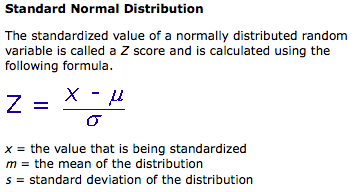

In [37]:
# use the means and standard deviations to create a new data matrix
def rescale(data_matrix):
    """rescales the input data so that each column
    has mean 0 and standard deviation 1
    leaves alone columns with no deviation"""
    means, stdevs = scale(data_matrix)
    
    def rescaled(i, j):
        if stdevs[j] > 0:
            return (data_matrix[i][j] - means[j]) / stdevs[j]
        else:
            return data_matrix[i][j]

    num_rows, num_cols = shape(data_matrix)
    return make_matrix(num_rows, num_cols, rescaled)

from IPython.display import Image
Image(filename='/Users/annalie/Dev/data-science-from-scratch/pictures/standardizing.png')

In [43]:
scale(worldbank_matrix)
rescale(worldbank_matrix)

[[1.776932610633792,
  1.7886984339786351,
  1.7884911938391876,
  1.7888451149334377,
  1.78868870958003,
  1.7876214971343622,
  1.7888007364232164,
  1.7884472091322974,
  1.6567896609926531,
  1.7859051085775106,
  1.7836759208631485,
  1.7870679754763572,
  1.7885626436920417,
  1.7888325292781082,
  1.788207062779571,
  1.7885248085156749,
  1.786680318716756,
  1.788696093666597,
  1.7888434568724403,
  1.7886361313515968,
  1.7888102679890665,
  1.730006073595823,
  1.7887791231516807,
  1.7883707695688476,
  1.787896287500837,
  1.7886208822803151,
  1.7883735764747748,
  1.788573506042729,
  1.7877486731387062,
  1.7883719079754294,
  1.7886544853868762,
  1.7885495592082281,
  1.788835928340114,
  1.7886904517969089,
  1.7886225377989058,
  1.788502981323688,
  1.7876687630780252,
  1.7262353592416189,
  1.7888425053579982,
  1.7887986856475762,
  1.7849631080529362,
  1.7888208237671526,
  1.787364304856811,
  1.7880212121734422,
  1.7665420950843695,
  1.7876418776531022,


# Dimensionality Reducion

    An example of a technique to reduce the dimensions of the data set is Principal Component Analysis (PCA).
    This technique extracts one or more dimensions that capture as much of the variation in the data as possible.

In [45]:
# first translate the data so that each dimension has mean zero
def de_mean_matrix(A):
    """returns the result of subtracting from every value in A the mean value of its column.
    the resulting matrix has mean 0 in every column"""
    nr, nc = shape(A)
    column_means, _ = scale(A)
    return make_matrix(nr, nc,
                      lambda i, j: A[i][j] - column_means[j])

# if we don't have columns with mean zero, 
# the technique is likely to identify the mean itself rather than the variation in the data

In [46]:
# define the direction that captures the greatest variance in the data
# every nonzero ector w determines a direction if we rescale to have magnitude 1
def direction(w):
    mag = magnitude(w)
    return [w_i / mag for w_i in w]

In [47]:
# given a nonzero vector w, compute the variance of the data set in the direction determined by w
def directional_variance_i(x_i, w):
    """the variance of the row x_i in the direction determined by w"""
    return dot(x_i, direction(w)) ** 2

def directional_variance(X, w):
    """the variance of the data in the direction determined w"""
    return sum(directional_variance_i(x_i, w)
              for x_i in X)

In [48]:
# find the direction that maximizes this variance
# use gradient descent for this
def directional_variance_gradient_i(x_i, w):
    """the contribution of row x_i to the gradient of
    the direction-w variance"""
    projection_length = dot(x_i, direction(w))
    return [2 * projection_length * x_ij for x_ij in x_i]

def directional_variance_gradient(X, w):
    return vector_sum(directional_variance_gradient_i(x_i,w) for x_i in X)

In [50]:
# define the first principal component, which is the direction that maximizes the directioinal_variance function
def first_principal_component(X):
    guess = [1 for _ in X[0]]
    unscaled_maximmizer = miximize_batch(
    partial(directional_Variance, X),
    partial(directional_variance_gradient, X),
    guess)
    return direction(unscaled_maximizer)

# or using stochastic gradient descent
def first_principal_component_sgd(X):
    guess = [1 for _ in X[0]]
    unscaled_maximizer = maximize_stochastic(
        lambda x, _, w: directional_variance_i(x, w),
        lambda x, _, w: directional_variance_gradient_i(x, w),
        X, [None for _ in X], guess)
    return direction(unscaled_maximizer)

In [51]:
# project the data and find the values of the first principal component
def project(v, w):
    """return the projection of v onto the direction w"""
    projection_length = dot(v, w)
    return scalar_multiply(projection_length, w)

In [53]:
# find further components

# 1. remove the projections from the data
def remove_projection_from_vector(v, w):
    """projects v onto w and subracts the result from v"""
    return vector_subtract(v, project(v, w))

def remove_projection(X, w):
    """for each row of X
    projects the row onto w, and subtracts the result from the row"""
    return [remove_projection_from_vector(x_i, w) for x_i in X]

# 2. find as many components as we want
def principal_component_analysis(X, num_components):
    components = []
    for _ in range(num_components):
        component = first_principal_compoent(x)
        components.append(component)
        X = remove_projection(X, component)
        
    return components

In [54]:
# transform the data in the lower-dimensional space spanned by the components
def transform_vector(v, components):
    return [dot(v, w) for w in components]
def transform(X, components):
    return [transform_vector(x_i, components) for x_i in X]